# MNIST Digit Addition (Single Digit)

The digit addition problem is a simple but illustrative example used in (Manhaeve et al. 2018) to illustrate DeepProbLog’s ability to do both logical reasoning and deep learning. The task is, given a pair of digit images (MNIST) and their sum as the label, let a neural network learn the digit classification of the input images.
## Data Format
### train_dataset
Pytorch Dataset object consisting of 30000 data instances of the form:

    [dataTensor1, dataTensor2, labelTensor]

where dataTensor1 and dataTensor2 are tensors of size (1,28,28) for 2 digit images and
label is an integer tensor for the label.

train_dataset is used to generate dataList, where each dataTensor in train_dataset is
reshaped to (1,1,28,28) by dataTensor.unsqueeze(0) .
### test_loader
Pytorch DataLoader object consisting of 10 batches in the following format

    [  
      [dataTensors, labelTensors]  
      ...  
      [dataTensors, labelTensors]  
    ]

Here dataTensors is of the form   [data, ..., data], and consists of 1000 data.

labelTensors is of the form [label, ..., label], and consists of 1000 labels.

data is a tensor of size (1,28,28) for a digit image and label is an integer tensor  
for its label.

## Imports

In [1]:
import sys
sys.path.append("../../")
import time

import torch

from dataGen import dataList, obsList, test_loader
from dlpmln import DeepLPMLN
from network import Net

## DeepLPMLN Program

In [2]:
dprogram = '''
img(i1). img(i2).
addition(A,B,N) :- digit(A,0,N1), digit(B,0,N2), N=N1+N2.
nn(m(X,1), digit, [0,1,2,3,4,5,6,7,8,9]) :- img(X).
'''

## Neural Network Instantiation
- Instantiate neural networks.
- Define nnMapping: a dictionary that maps neural network names (i.e., strings) to the neural network objects (i.e., torch.nn.Module object)
- Define optimizers: a dictionary that specifies the optimizer for each network (we use the Adam optimizer here).

In [3]:
m = Net()
nnMapping = {'m':m}
optimizers = {'m':torch.optim.Adam(m.parameters(), lr=0.001)}

## Create DeepLPMLN Object

In [4]:
dlpmlnObj = DeepLPMLN(dprogram, nnMapping, optimizers)

## Training and Testing

In [5]:
startTime = time.time()
for i in range(1):
    print('Epoch {}...'.format(i+1))
    time1 = time.time()
    dlpmlnObj.learn(dataList=dataList, obsList=obsList, epoch=1)
    time2 = time.time()
    dlpmlnObj.testNN("m", test_loader)
    print("--- train time: %s seconds ---" % (time2 - time1))
    print("--- test time: %s seconds ---" % (time.time() - time2))
    print('--- total time from beginning: %s minutes ---' % int((time.time() - startTime)/60) )

Epoch 1...
Test Accuracy on NN Only for m: 98%
--- train time: 339.69762897491455 seconds ---
--- test time: 2.1765942573547363 seconds ---
--- total time from beginning: 5 minutes ---


## DeepLPMLN vs DeepProbLog vs CNN

The following image shows the accuracy on the test data after each iteration of training data.
The method CNN denotes the baseline introduced in (Manhaeve et al. 2018) where a
convolutional neural network (with more parameters) is trained to classify the concatenation of
the two images into the 19 possible sums. 

As we can see, the neural networks trained by DeepLPMLN and DeepProbLog converge much
faster than CNN and have almost the same accuracy at each iteration. However, DeepLPMLN
spends much less time for training compared to DeepProbLog. The time reported is for one
epoch (30,000 iterations in gradient descent). This is because DeepProbLog constructs an
SDD (Sequential Decision Diagram) at each iteration for each training instance (i.e., each pair of
images) while SDD construction is time consuming.

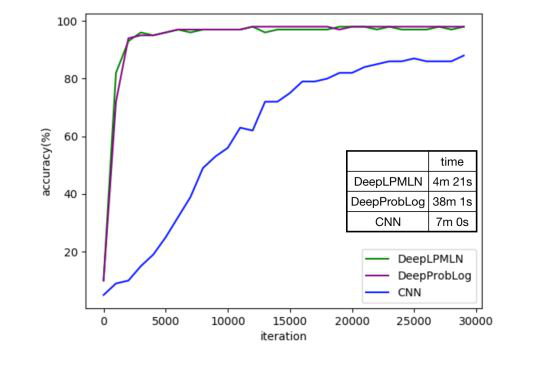

In [7]:
from IPython.display import display
from PIL import Image
path="training_comparison.jpg"
display(Image.open(path))